In [1]:
import numpy as np

from getdist       import plots, MCSamples 
from astropy.table import Table

In [2]:
root = '/global/cscratch1/sd/mjwilson/norberg/GAMA4/cobaya/'

In [3]:
dat = Table.read(root + 'schechter_chain.1.txt', format='ascii')        

In [4]:
samples = np.c_[dat['log10phistar'], dat['Mstar'], dat['alpha']]

In [5]:
samples = MCSamples(samples=samples, names=['log10phistar', 'Mstar', 'alpha'], labels=['log10phistar', 'Mstar', 'alpha'])

Removed no burn in


In [6]:
tmr_ref = {'log10phistar': -2.01, 'Mstar': -20.89, 'alpha': -1.25}

In [7]:
g = plots.get_subplot_plotter()

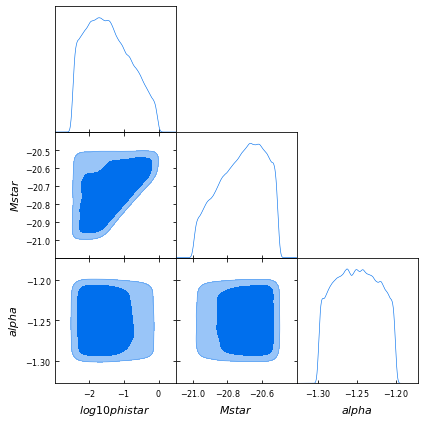

In [8]:
g.triangle_plot([samples], filled=True)        

# Done.